# MSDS 400 Winter 2020 Practice Final

<div class="alert alert-block alert-success"><b>Problem 1.</b> Northwest Molded molds plastic handles which cost \$1.00 per handle to mold. The fixed cost to run the molding machine is \$5259 per week. If the company sells the handles for \$4.00 each, how many handles must be molded weekly to break even?</div>

In [13]:
# Individual unit costs
handle_molding_cost = 1.0
handle_sales_price = 4.0

# Fixed weekly costs
weekly_fixed_costs = 5259.0

# Number of handles needed to break-even or cover fixed costs
break_even_total = round(weekly_fixed_costs/(handle_sales_price-handle_molding_cost))

print("Number of handles to be molded weekly to break-even (or cover the fixed costs) = {}".format(break_even_total,"{:d}"))


Number of handles to be molded weekly to break-even (or cover the fixed costs) = 1753


<div class="alert alert-block alert-success"><b>Problem 2.</b> For the following table of data:

<table>
 <tr>
  <td><b>x</b></td>
  <td>1</td>
  <td>2</td>
  <td>3</td>
  <td>4</td>
  <td>5</td>
  <td>6</td>
  <td>7</td>
  <td>8</td>
  <td>9</td>
  <td>10</td>
 </tr>
 <tr>
  <td><b>y</b></td>
  <td>0.1</td>
  <td>0.7</td>
  <td>1.1</td>
  <td>2.1</td>
  <td>2.9</td>
  <td>3.1</td>
  <td>3.1</td>
  <td>4.1</td>
  <td>4.6</td>
  <td>5.1</td>
 </tr>
</table>


<br><b>(a)</b> Draw a scatterplot.</br>
<br><b>(b)</b> Calculate the correlation coefficient.</br>
<br><b>(c)</b> Calculate the least squares line and graph it on the scatterplot.</br>
<br><b>(d)</b> Predict the y-value when x is 11.</br></div>


 b. 
Option 1: Correlation Coefficient (corrcoef):  0.989
Option 2: Correlation Coefficient (pearsonr):  0.989

 c. Least-squares line
Y =  0.55 x +  -0.33

 d. 
When x = 11.0, using linregress, we predict that y =  5.7
When x = 11.0, using polyfit, we predict that y =  5.7


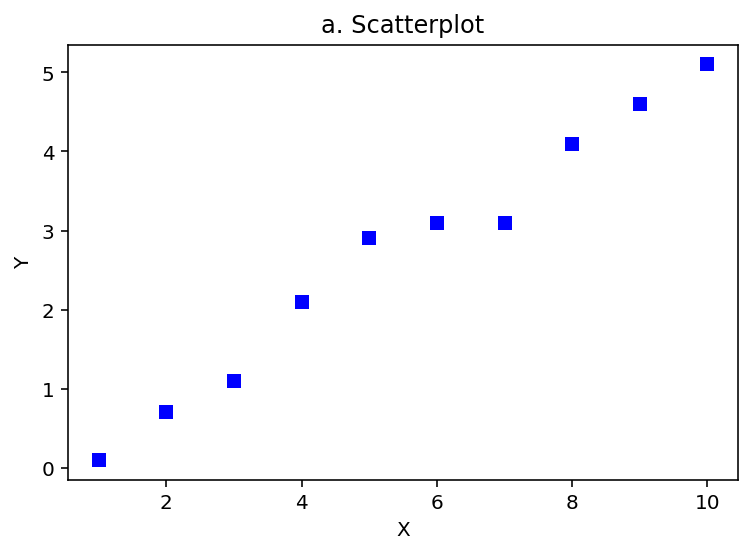

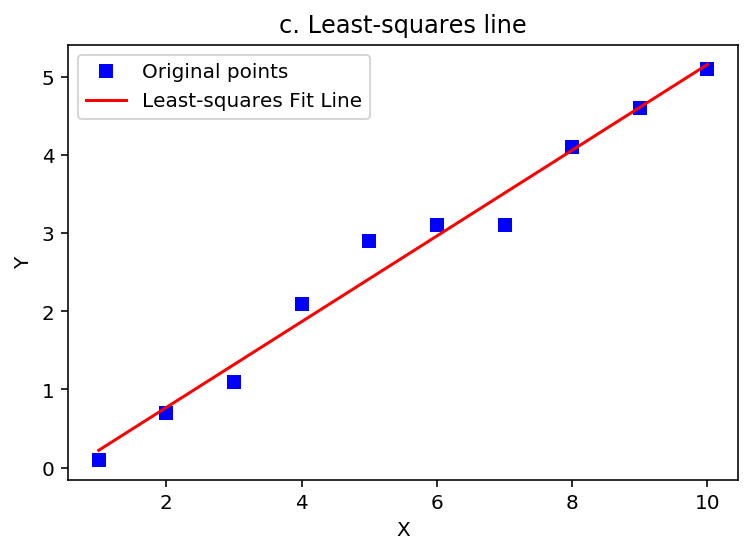

In [15]:
%matplotlib inline

# Packages we can use
from scipy.stats.stats import pearsonr
import scipy.stats as st
import numpy as np
import matplotlib.pyplot as plt

'''
a. Draw a scatterplot. 
Use numpy arrays to store x and y
'''
x = np.arange(1,11)
y = np.array([0.1,0.7,1.1,2.1,2.9,3.1,3.1,4.1,4.6,5.1])

plt.figure()
plt.title("a. Scatterplot")
plt.plot(x, y, 'bs',label='Origial datapoints')
plt.xlabel('X')
plt.ylabel('Y')


'''
b. Calculate the correlation coefficient. 

Two options- using the corrcoef function from numpy or pearsonr function
'''

print("\n b. ")

corr_np = np.corrcoef(x, y)[0, 1]
corr_sci = pearsonr(x, y)[0]
print("Option 1: Correlation Coefficient (corrcoef): ",round(corr_np,3))
print("Option 2: Correlation Coefficient (pearsonr): ",round(corr_sci,3))

'''
c. Calculate the least squares line and graph it on the scatterplot. 
'''
'''
For deeper exploration of pyplot visit:
http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot
'''

'''
Pass in the parameters x and y to the lingress function of scipy.stats package 
The function returns 5 values: slope, intercept, rvalue, pvalue, stderr 
'''
slope,intercept,rvalue,pvalue,stderr = st.linregress(x,y)
print("\n c. Least-squares line")


print("Y = ", round(slope,2), "x + ",round(intercept,2)) 

# Scatter plot of the various points and a least-squares fit line
plt.figure()
plt.title("c. Least-squares line")
plt.plot(x, y, 'bs',label='Original points')
plt.plot(x, slope*x + intercept, 'r-',label='Least-squares Fit Line')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()

'''
d. Predict the y-value when x is 11.

Two options - 
Option 1: Use the linear regression function in scipy.stats.
Option 2: Use numpy.polyfit

To keep things simple you are mostly concerned with the slope and intercept since
these can be used to determine the relationship between x and y
'''
print("\n d. ")

# We have slope and an intercept from the lingress function earlier. That is enough to 'predict' the value between x and y
x_val = 11.0
predicted = slope*x_val + intercept
print('When x = 11.0, using linregress, we predict that y = ', round(predicted,1))

''' 
Option 2) This second option is really useful because you can use this to 
fit non-linear polynomials as well e.g. y = a*x**2 + b just by
specifying the 'degree' of the equation as the third parameter

For deeper exploration visit:
http://docs.scipy.org/doc/numpy/reference/generated/numpy.polyfit.html 
'''

# pass x, y and a degree of 1 since we know there is a linear relationship
ply_slope, ply_intercept = np.polyfit(x, y, 1)

# c)
x_val = 11.0
polyfit_predicted = ply_slope * x_val + ply_intercept
print('When x = 11.0, using polyfit, we predict that y = ', round(polyfit_predicted,1))


<div class="alert alert-block alert-success"><b>Problem 3.</b> The amount of nitrogen (in lb/acre), phosphate (in lb/acre), and labor (in hr/acre) needed to grow honeydews, yellow onions, and lettuce in a particular state is given by the table below.

<table>
 <tr>
  <th>&nbsp;</th>
  <th>Honeydews</th>
  <th>Onions</th>
  <th>Lettuce<th>
 </tr>
 <tr>
  <td>Nitrogen</td>
  <td>110</td>
  <td>170</td>
  <td>190</td>
 </tr>
 <tr>
  <td>Phosphate</td>
  <td>190</td>
  <td>80</td>
  <td>80</td>
 </tr>
 <tr>
  <td>Labor</td>
  <td>4.97</td>
  <td>4.45</td>
  <td>4.65</td> 
 </tr>
</table>


**(a)** If the farmer has 230 acres, 31500 lb of nitrogen, 33800 lb of phosphate, and 350 hours of labor, is it possible to use all resources completely? If so, how maby acres should he allot for each crop?

**(b)** Suppose everything is the same as in part (a) except that 1104.3 hours of labor are available. Is it possible to use all resources completely? If so, how many acres should he allot for each crop?</div>

**Solution (a):** Let x be the number of acres of honeydew, y be the number of acres for yellow onions, and z b the number of acres for lettuce. The system of linear equations is:

110x + 170y + 190z = 31500<br>
190x + 80y + 80z = 33800<br>
4.97x + 4.45y + 4.65z = 350<br>

In [4]:
import numpy as np
from scipy import linalg
a = np.array([[110, 170, 190],[190, 80, 80],[4.97, 4.45, 4.65]])
b = np.array([31500, 33800, 350])
np.dot(linalg.inv(a),b)

array([  423.43823391, -4786.16486613,  4202.99906059])

<font color=red>Any negative values appearing in the solution would not make sense and would revert to 0. Thus, it is not possible to use all resources completely.</font>

**Solution (b):** Let x be the number of acres of honeydew, y be the number of acres for yellow onions, and z b the number of acres for lettuce. The system of linear equations is:

110x + 170y + 190z = 31500<br>
190x + 80y + 80z = 33800<br>
4.97x + 4.45y + 4.65z = 1104.3<br>

In [5]:
import numpy as np
from scipy import linalg
a = np.array([[110, 170, 190],[190, 80, 80],[4.97, 4.45, 4.65]])
b = np.array([31500, 33800, 1104.3])
np.dot(linalg.inv(a),b)

array([140.,  50.,  40.])

<font color=green>Since all values add to the total number of acres available, it is possible to use all resources completely. The farmer should allot 140 acres for honeydews, 50 acres for yellow onions, and 40 acres for lettuce for a total of 230 acres.</font>

<div class="alert alert-block alert-success"><b>Problem 4.</b> A basketball fieldhouse seats 15,000. Courtside seats cost \$10 , endzone seats cost \$6 , and balcony seats cost \$4. The total revenue for a sellout is \$82,000. If half the courtside seats, half the balcony seats, and all the endzone seats are sold; then the total revenue is \$47,000. How many of each type of seat are there?</div>

**Solution:** Let c be the maximum number of courtside seats available.
Let e be the maximum number of endzone seats available.
Let b be the maximum number of balcony seats available.

** Total number of seats ** <br/>
c + e + b = 15000

** Total revenue from sellout ** <br/>
10c + 6e + 4b = 82000

** When revenue is \$47,000 ** <br/>
1/2(10c) + 6e + 1/2(4b) = 47000 <br/>
=> 5c + 6e + 2b = 47000






In [6]:
import numpy as np

# Set up the constraints and obtain the points of intersection
lhs = np.array([[1,1,1], [10,6,4], [5,6,2]])
rhs = np.array([15000,82000,47000])

# solve the three sets of equations 
seats = np.linalg.solve(lhs, rhs)

print("Number of courtside seats = {}".format(round(seats[0])))
print("Number of endzone seats = {}".format(round(seats[1])))
print("Number of balcony seats = {}".format(round(seats[2])))


Number of courtside seats = 3000.0
Number of endzone seats = 2000.0
Number of balcony seats = 10000.0


<div class="alert alert-block alert-success"><b>Problem 5.</b> An airline with two types of airplanes, P1 and P2, has contracted with a tour group to provide transportation for a minimum of 400 first class, 750 tourist class, and 1500 economy class passengers. For a certain trip, airplane P1 costs \$10,000 to operate and can accommodate 20 first class, 50 tourist class, and 110 economy class passengers. Airplane P2 costs \$8500
to operate and can accommodate 18 first class, 30 tourist class and 44 economy class passengers. How many of each type of airplane should be used in order to minimize the operating cost?</div>

**Solution:**
Let p1 be the number of P1 airplanes<br>
Let p2 be the number of P2 airplanes<br>

Operating cost to be minimized = 10000x + 8500y <br>
Subject to:
* 20p1 + 18p2 ≥ 400  
* 50p1  + 30p2 ≥ 750
* 110p1  + 44p2 ≥ 1500
* p1 ≥ 0, p2 ≥ 0 <br>


In [5]:
pip install pulp

     |████████████████████████████████| 39.2MB 6.8MB/s eta 0:00:012
Note: you may need to restart the kernel to use updated packages.


In [16]:
from pulp import LpVariable, LpProblem, LpStatus, value, LpMinimize

# declare your variables
p1 = LpVariable("p1", 0, None) # p1>=0
p2 = LpVariable("p2", 0, None) # p2>=0


# defines the problem
prob = LpProblem("problem", LpMinimize)

# defines the constraints
prob += 20*p1 + 18*p2 >= 400
prob += 50*p1 + 30*p2 >= 750
prob += 110*p1 + 44*p2 >= 1500

# defines the objective function to minimize
prob += 10000*p1 + 8500*p2

# solve the problem
status = prob.solve()
LpStatus[status]

# print the results
print("Pulp Solution for p1 and p2")
print(round(value(p1)))
print(round(value(p2)))
print("Minimum value of {}".format(value(prob.objective)))

Pulp Solution for p1 and p2
9
13
Minimum value of 193636.55


<div class="alert alert-block alert-success"><b>Problem 6.</b> As part of a weight reduction program, a man designs a monthly exercise program consisting of bicycling, jogging, and swimming. He would like to exercise at most 30 hours, devote at most 8 hours to swimming, and jog for no more than the total number of hours bicycling and swimming. The calories burned by this person per hour by bicycling, jogging, and swimming are 200, 630, and 260, respectively. How many hours should be allotted to each activity to maximize the number of calories burned? What is the maximum number of calories he will burn? (Hint: Write the constraint involving jogging in the
    form <= 0.)</div>

**Solution:**
Let x1 be the number of hours spent bicycling, let x2 be the number of hours spent jogging, and let x3 be the number of hours spent swimming. What is the objective function?

Objective function = 200x1 + 630x2 + 260x3 <br>
Subject to:
* x1 + x2 + x3 <= 30  
* x3 <= 8
* x2 <= x1 + x3
* x ≥ 0, y ≥ 0 <br>


In [19]:
from pulp import LpVariable, LpProblem, LpMaximize, GLPK, LpStatus, value

model = LpProblem("problem", LpMaximize)
x1 = LpVariable("x1", 0, None) # x1 >= 0
x2 = LpVariable("x2", 0, None) # x2 >= 0
x3 = LpVariable("x3", 0, None) # x3 >= 0

model += x1 + x2 + x3 <= 30
model += x3 <= 8
model += x2 <= x1 + x3

model += 200*x1 + 630*x2 + 260*x3

# solve the problem
status = model.solve()
LpStatus[status]

print("To maximize the number of calories burned, the man should spend {} hours bicycling, {} hours jogging, and {} hours swimming.".format(value(x1),value(x2),value(x3)))

maximum_calories = value(model.objective)
print('He will burn a maximum of {} calories.'.format(maximum_calories))

To maximize the number of calories burned, the man should spend 7.0 hours bicycling, 15.0 hours jogging, and 8.0 hours swimming.
He will burn a maximum of 12930.0 calories.


<div class="alert alert-block alert-success"><b>Problem 7.</b> A company's lawn seed mixtures contain three types of seeds: bluegrass, rye, and Bermuda. The costs per pound of the three types are 9 cents, 11 cents, and 3 cents, respectively. In each batch there must be at least 25% bluegrass seed and the amount of Bermuda must be no more than two-thirds the amount of rye. To fill current orders the company must make at least 8000 pounds of the mixture. How much of each kind of seed should be used to minimize cost?</div>

**Solution:** Let x be the pounds of bluegrass seed <br>
Let y be the pounds of rye seed <br>
Let z be the pounds of Bermuda seed <br>

Cost to be minimized = 0.09x + 0.11y + 0.03z <br>
Subject to:
* x ≥ 0.25(x + y + z) ==> 0.75x - 0.25y - 0.25z ≥ 0
* z ≤ 2/3y
* x + y + z ≥ 8000
* x ≥ 0 y ≥ 0 z ≥ 0 


In [21]:
from pulp import LpVariable, LpProblem, GLPK, LpStatus, value, LpMinimize

model = LpProblem("problem", LpMinimize)
x = LpVariable("x", 0, None) # x >= 0
y = LpVariable("y", 0, None) # y >= 0
z = LpVariable("z", 0, None) # z >= 0

model += 0.75*x - 0.25*y - 0.25*z >= 0
model += 2/3*y - z >= 0

model += x + y + z >= 8000

model += 0.09*x + 0.11*y + 0.03*z

# solve the problem
status = model.solve()
LpStatus[status]

minimum_cost = value(model.objective)

print("The minimum cost of ${} occurs with a mixture of {} pounds of bluegrass, {} pounds of rye, and {} pounds of Bermuda.".format(minimum_cost,value(x),value(y),value(z)))


The minimum cost of $648.0 occurs with a mixture of 2000.0 pounds of bluegrass, 3600.0 pounds of rye, and 2400.0 pounds of Bermuda.


<div class="alert alert-block alert-success"><b>Problem 10.</b> The projected population of a certain ethnic group (in millions) can be approximated by p(t) = 37.69$(1.024)^{t}$ where t = 0 corresponds to 2000 and 0 ≤ t ≤ 50 <br/>
a. Estimate the population of this group for the year 2010.<br/>
b. What is the instantaneous rate of change of the population when t = 10?</div>

In [28]:
# Age distribution Function

def f(x):
    f = 37.69 * (1.024**x)
    return f

population_in_2010 = round(f(10),3)

print ("The population in 2010 is {} million people.".format(population_in_2010,'%d'))


# A general function for calculating the slope between two points: x and x+delta. 
# See Lial Section 11.3 dealing with instantaneous rates of change.
def der(x, delta):
    delta = float(delta)
    if delta < 0.0000001:
        print('Value chosen for delta is too small.')
        return 1 / delta
    else:
        slope = (f(x + delta) - f(x)) / delta 
        return slope

# The following statements initialize variables for computation.
point = 1.0

rate_of_change=round(der(10,0.000001),3)

print("The instantaneous rate of change in the population when t = 10 is {} million people per year ".format(rate_of_change,'%d'))


The population in 2010 is 47.778 million people.
The instantaneous rate of change in the population when t = 10 is 1.133 million people per year 


<div class="alert alert-block alert-success"><b>Problem 11.</b> Since the creation of a social program, the percent of persons 65 years and over with a family income below the poverty level has declined. The percent can be approximated by the function P(t) = 30.29 - 5.86ln(t), where t is the number of years since 1965. Complete parts a. through d.<br>

**(a)** Find the percent of persons 65 years and over with family income below the poverty level and the rate of change in 1970. <br>
**(b)** Find the percent of persons 65 years and over with family income below the poverty level and the rate of change in 1990. <br>
**(c)** Find the percent of persons 65 years and over with family income below the poverty level and the rate of change in 2010. <br>
**(d)** What happens to the rate of change over time?</div>

**Solution (a):**

In [23]:
# percent of persons 65 years and over with family income below the poverty level in 1970:
import math
P = 30.29 - 5.86*math.log(5)
print("The percent of persons over 65 years with family income below the poverty level in 1970 was", round(P, 2),"percent.")

# block of code to determine derivative. Does not recognize f_prime as a function.
from sympy import Symbol, lambdify, log
t = Symbol('t')
f = 30.29 - 5.86*log(t)
f_prime = f.diff(t)

# 2nd block of code needed to pass the 'symbol' and f_prime to recognize and use as a function.
f = lambdify(t, f)
f_prime = lambdify(t, f_prime)
print("The rate of change in 1970 was", round(f_prime(5), 4),"percent.")

The percent of persons over 65 years with family income below the poverty level in 1970 was 20.86 percent.
The rate of change in 1970 was -1.172 percent.


**Solution (b):**

In [24]:
# percent of persons 65 years and over with family income below the poverty level in 1990:
import math
P = 30.29 - 5.86*math.log(25)
print("The percent of persons over 65 years with family income below the poverty level in 1990 was", round(P, 2),"percent.")

# block of code to determine derivative. Does not recognize f_prime as a function.
from sympy import Symbol, log, lambdify
t = Symbol('t') 
f = 30.29 - 5.86*log(t)
f_prime = f.diff(t)

# 2nd block of code needed to pass the 'symbol' and f_prime to recognize and use as a function.
f = lambdify(t, f)
f_prime = lambdify(t, f_prime)
print("The rate of change in 1990 was", round(f_prime(25), 4),"percent.")

The percent of persons over 65 years with family income below the poverty level in 1990 was 11.43 percent.
The rate of change in 1990 was -0.2344 percent.


**Solution (c):**

In [14]:
# percent of persons 65 years and over with family income below the poverty level in 2010:
import math
P = 30.29 - 5.86*math.log(45)
print("The percent of persons over 65 years with family income below the poverty level in 2010 was", round(P, 2),"percent.")

# block of code to determine derivative. Does not recognize f_prime as a function.
from sympy import Symbol, log, lambdify
t = Symbol('t') 
f = 30.29 - 5.86*log(t)
f_prime = f.diff(t)

# 2nd block of code needed to pass the 'symbol' and f_prime to recognize and use as a function.
f = lambdify(t, f)
f_prime = lambdify(t, f_prime)
print("The rate of change in 2010 was", round(f_prime(45), 4),"percent.")

The percent of persons over 65 years with family income below the poverty level in 2010 was 7.98 percent.
The rate of change in 2010 was -0.1302 percent.


**Solution (d):** The rate of change over time is approaching 0.

<div class="alert alert-block alert-success"><b>Problem 17.</b> An oil tanker is leaking oil at a rate given in barrels per hour by the function shown below, where t is the time in hours after the tanker hits a hidden rock (when t = 0). Complete parts (a) through (c). <br>

L'(t) = <u>62ln(t + 1)</u><br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;t + 1<br>
<br>(a) Find the total number of barrels that the ship will leak on the first day.
<br>(b) Find the total number of barrels that the ship will leak on the second day.</div>

In [27]:
# Growth Function

import math

def f(t):
    f = 62*math.log(t+1)/(t+1)
    return f

# Integrate is a general numerical integration function.  It requires
# an interval [a,b] and n = the number of subintervals used for integration.
# Integrate uses the function defined as f above.  For details refer
# to Lial Section 15.3.

def integrate(a,b,n):
    total = 0.0
    delta = (b-a)/n
    for i in range(n):
        total += delta*(f(a+delta*(i+1))+f(a+delta*i))/2
    return total

# Barrels leaked on first day 
b1 = 24.0
a1 = 0.0
n1 = 100

first_day_leak = round(integrate(a1,b1,n1),3)

print ("The total number of barrels that the ship will leak on the first day = {:.0f}".format(first_day_leak))

# Barrels leaked on second day 

b2 = 48.0
a2 = 24.0
n2 = 100

second_day_leak = round(integrate(a2,b2,n2),3)

print ("The total number of barrels that the ship will leak on the second day = {:.0f}".format(second_day_leak))

The total number of barrels that the ship will leak on the first day = 321
The total number of barrels that the ship will leak on the second day = 148
